<a href="https://colab.research.google.com/github/sampaio-arthur/projetoligapy1/blob/main/projetoligapy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

In [ ]:
df = pd.df = pd.read_csv('data.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
# verificar o número de linhas e colunas
print("Número de linhas e colunas:", df.shape)

# verificar tipos de dados das colunas
print("Tipos de dados das colunas:", df.dtypes)

# verificar dados faltantes
print("Dados faltantes por coluna:")
print(df.isnull().sum())


Número de linhas e colunas: (457, 15)
Tipos de dados das colunas: Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Dados faltantes por coluna:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes   

In [ ]:
# excluir colunas
colunas_para_excluir = ['Id','TrackerDistance', 'LoggedActivitiesDistance', 'SedentaryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
df.drop(colunas_para_excluir, axis=1, inplace=True)
df

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,Calories
0,3/25/2016,11004,7.110000,2.57,33,1819
1,3/26/2016,17609,11.550000,6.92,89,2154
2,3/27/2016,12736,8.530000,4.66,56,1944
3,3/28/2016,13231,8.930000,3.19,39,1932
4,3/29/2016,12041,7.850000,2.16,28,1886
...,...,...,...,...,...,...
452,4/8/2016,23014,20.389999,11.10,70,4196
453,4/9/2016,16470,8.070000,0.00,90,3841
454,4/10/2016,28497,27.530001,21.92,128,4526
455,4/11/2016,10622,8.060000,1.47,18,2820


In [ ]:
# novos nomes (renomear)
new_names =  {'ActivityDate' : 'Data', 'TotalSteps' : 'Passos', 'TotalDistance' : 'Distância', 'VeryActiveDistance' : 'Distância_Ativa', 'VeryActiveMinutes' : 'Minutos_Ativos', 'Calories' : 'Calorias'}

df.rename(columns=new_names, inplace=True)

df.head()

,Data,Passos,Distância,Distância_Ativa,Minutos_Ativos,Calorias
0,3/25/2016,11004,7.11,2.57,33,1819
1,3/26/2016,17609,11.55,6.92,89,2154
2,3/27/2016,12736,8.53,4.66,56,1944
3,3/28/2016,13231,8.93,3.19,39,1932
4,3/29/2016,12041,7.85,2.16,28,1886


In [ ]:
# formatação da data
df['Data'] = pd.to_datetime(df['Data'])


# Encontrar a menor e a maior data
menor_data = df['Data'].min()
maior_data = df['Data'].max()

# período
print("Começo:", {menor_data.strftime('%d/%m/%Y')})
print("Fim:", {maior_data.strftime('%d/%m/%Y')})



Começo: {'12/03/2016'}
Fim: {'12/04/2016'}


In [ ]:
# contar o número de dias registrados
contagem_dias = df['Data'].nunique()
print(f"Número de dias registrados: {contagem_dias}")

Número de dias registrados: 32


In [ ]:
# voltar com a formatação
df['Data'] = pd.to_datetime(df['Data']).dt.strftime('%d/%m/%Y')
df

,Data,Passos,Distância,Distância_Ativa,Minutos_Ativos,Calorias
0,25/03/2016,11004,7.110000,2.57,33,1819
1,26/03/2016,17609,11.550000,6.92,89,2154
2,27/03/2016,12736,8.530000,4.66,56,1944
3,28/03/2016,13231,8.930000,3.19,39,1932
4,29/03/2016,12041,7.850000,2.16,28,1886
...,...,...,...,...,...,...
452,08/04/2016,23014,20.389999,11.10,70,4196
453,09/04/2016,16470,8.070000,0.00,90,3841
454,10/04/2016,28497,27.530001,21.92,128,4526
455,11/04/2016,10622,8.060000,1.47,18,2820


In [ ]:
# arredondar os valores na coluna 'Distância' para duas casas decimais
df['Distância'] = df['Distância'].round(2)
df

,Data,Passos,Distância,Distância_Ativa,Minutos_Ativos,Calorias
0,25/03/2016,11004,7.11,2.57,33,1819
1,26/03/2016,17609,11.55,6.92,89,2154
2,27/03/2016,12736,8.53,4.66,56,1944
3,28/03/2016,13231,8.93,3.19,39,1932
4,29/03/2016,12041,7.85,2.16,28,1886
...,...,...,...,...,...,...
452,08/04/2016,23014,20.39,11.10,70,4196
453,09/04/2016,16470,8.07,0.00,90,3841
454,10/04/2016,28497,27.53,21.92,128,4526
455,11/04/2016,10622,8.06,1.47,18,2820


In [ ]:
# adicionar 'km' ao lado dos valores nas colunas 'Distância' e 'Distância_Ativa'
df['Distância'] = df['Distância'].round(2).astype(str) + ' km'
df['Distância_Ativa'] = df['Distância_Ativa'].round(2).astype(str) + ' km'
df


,Data,Passos,Distância,Distância_Ativa,Minutos_Ativos,Calorias
0,25/03/2016,11004,7.11 km,2.57 km,33,1819
1,26/03/2016,17609,11.55 km,6.92 km,89,2154
2,27/03/2016,12736,8.53 km,4.66 km,56,1944
3,28/03/2016,13231,8.93 km,3.19 km,39,1932
4,29/03/2016,12041,7.85 km,2.16 km,28,1886
...,...,...,...,...,...,...
452,08/04/2016,23014,20.39 km,11.1 km,70,4196
453,09/04/2016,16470,8.07 km,0.0 km,90,3841
454,10/04/2016,28497,27.53 km,21.92 km,128,4526
455,11/04/2016,10622,8.06 km,1.47 km,18,2820


In [ ]:
# remover todas as linhas do DataFrame onde ‘Minutos_Ativos’ é igual a 0.
df = df[df['Minutos_Ativos'] != 0]
df = df[df['Passos'] != 0]
df = df[df['Calorias'] != 0]

# convertendo a coluna 'Distância_Ativa' para string
df['Distância_Ativa'] = df['Distância_Ativa'].astype(str)

df = df[df['Distância_Ativa'] != '0.0 km']

df


,Data,Passos,Distância,Distância_Ativa,Minutos_Ativos,Calorias
0,25/03/2016,11004,7.11 km,2.57 km,33,1819
1,26/03/2016,17609,11.55 km,6.92 km,89,2154
2,27/03/2016,12736,8.53 km,4.66 km,56,1944
3,28/03/2016,13231,8.93 km,3.19 km,39,1932
4,29/03/2016,12041,7.85 km,2.16 km,28,1886
...,...,...,...,...,...,...
450,06/04/2016,24136,20.91 km,12.22 km,87,4039
451,07/04/2016,10910,8.42 km,2.96 km,32,2947
452,08/04/2016,23014,20.39 km,11.1 km,70,4196
454,10/04/2016,28497,27.53 km,21.92 km,128,4526


In [ ]:
# função para fazer calorias por minuto
def calcular_calorias_por_minutos_ativos(row):
    total_minutos_ativos = row['Minutos_Ativos']
    return row['Calorias'] / total_minutos_ativos

df['Calorias_por_Minuto_Ativo'] = df.apply(calcular_calorias_por_minutos_ativos, axis=1).round(2)
df

,Data,Passos,Distância,Distância_Ativa,Minutos_Ativos,Calorias,Calorias_por_Minuto_Ativo
0,25/03/2016,11004,7.11 km,2.57 km,33,1819,55.12
1,26/03/2016,17609,11.55 km,6.92 km,89,2154,24.20
2,27/03/2016,12736,8.53 km,4.66 km,56,1944,34.71
3,28/03/2016,13231,8.93 km,3.19 km,39,1932,49.54
4,29/03/2016,12041,7.85 km,2.16 km,28,1886,67.36
...,...,...,...,...,...,...,...
450,06/04/2016,24136,20.91 km,12.22 km,87,4039,46.43
451,07/04/2016,10910,8.42 km,2.96 km,32,2947,92.09
452,08/04/2016,23014,20.39 km,11.1 km,70,4196,59.94
454,10/04/2016,28497,27.53 km,21.92 km,128,4526,35.36


In [ ]:
# media de calorias por dia
media_calorias_por_dia = df.groupby('Data')['Calorias'].mean()
print(media_calorias_por_dia.round(2))

Data
01/04/2016    2671.93
02/04/2016    2891.53
03/04/2016    2615.47
04/04/2016    2581.11
05/04/2016    2667.90
06/04/2016    2654.82
07/04/2016    2618.89
08/04/2016    2648.94
09/04/2016    2553.00
10/04/2016    2337.88
11/04/2016    2356.00
12/04/2016    1119.00
14/03/2016    2453.00
16/03/2016    3830.00
23/03/2016    2484.00
25/03/2016    1819.00
26/03/2016    2154.00
27/03/2016    1944.00
28/03/2016    2971.00
29/03/2016    2192.75
30/03/2016    2261.40
31/03/2016    2228.60
Name: Calorias, dtype: float64


In [ ]:
# media total de calorias
media_calorias = df['Calorias'].mean()
print(f"Média geral de calorias: {media_calorias.round()}")

Média geral de calorias: 2542.0


In [ ]:
# média de passos por dia
media_passos_por_dia = df.groupby('Data')['Passos'].mean()
print(f"Média de passos por dia:")
print(media_passos_por_dia.round())


Média de passos por dia:
Data
01/04/2016    10613.0
02/04/2016    12872.0
03/04/2016    10567.0
04/04/2016    11420.0
05/04/2016     9619.0
06/04/2016    11931.0
07/04/2016    11022.0
08/04/2016    10038.0
09/04/2016    11245.0
10/04/2016     8847.0
11/04/2016     9463.0
12/04/2016     5341.0
14/03/2016     8433.0
16/03/2016    12483.0
23/03/2016     7239.0
25/03/2016    11004.0
26/03/2016    17609.0
27/03/2016    12736.0
28/03/2016     7668.0
29/03/2016     8616.0
30/03/2016    10724.0
31/03/2016     9286.0
Name: Passos, dtype: float64


In [ ]:
# média total de passos
media_geral_passos = df['Passos'].mean()
print(f"Média geral de passos: {media_geral_passos.round()}")

Média geral de passos: 10480.0


In [ ]:
# soma total de passos
soma_total_passos = df['Passos'].sum()
print(f"Soma total de passos: {soma_total_passos}")

Soma total de passos: 2221799


In [ ]:
# soma total da distância
df['Distância'] = df['Distância'].str.replace(' km', '').astype(float)
soma_total_distancia = df['Distância'].sum()
print(f"Soma total de distância: {soma_total_distancia:.2f} km")

Soma total de distância: 1596.15 km


In [ ]:
# media de distância por dia
media_distancia_por_dia = df.groupby('Data')['Distância'].mean()
print("Média de distância por dia:")
print(media_distancia_por_dia)

Média de distância por dia:
Data
01/04/2016     7.640714
02/04/2016     9.428667
03/04/2016     7.371176
04/04/2016     8.326667
05/04/2016     6.870000
06/04/2016     8.630000
07/04/2016     7.893158
08/04/2016     7.451667
09/04/2016     7.969375
10/04/2016     6.718750
11/04/2016     6.696429
12/04/2016     3.840000
14/03/2016     6.230000
16/03/2016     8.990000
23/03/2016     5.340000
25/03/2016     7.110000
26/03/2016    11.550000
27/03/2016     8.530000
28/03/2016     5.220000
29/03/2016     5.927500
30/03/2016     7.344000
31/03/2016     6.180000
Name: Distância, dtype: float64


In [ ]:
# media total das distâncias
media_geral_distancia = df['Distância'].mean()
print(f"Média geral de distância: {media_geral_distancia:.2f} km")

Média geral de distância: 7.53 km


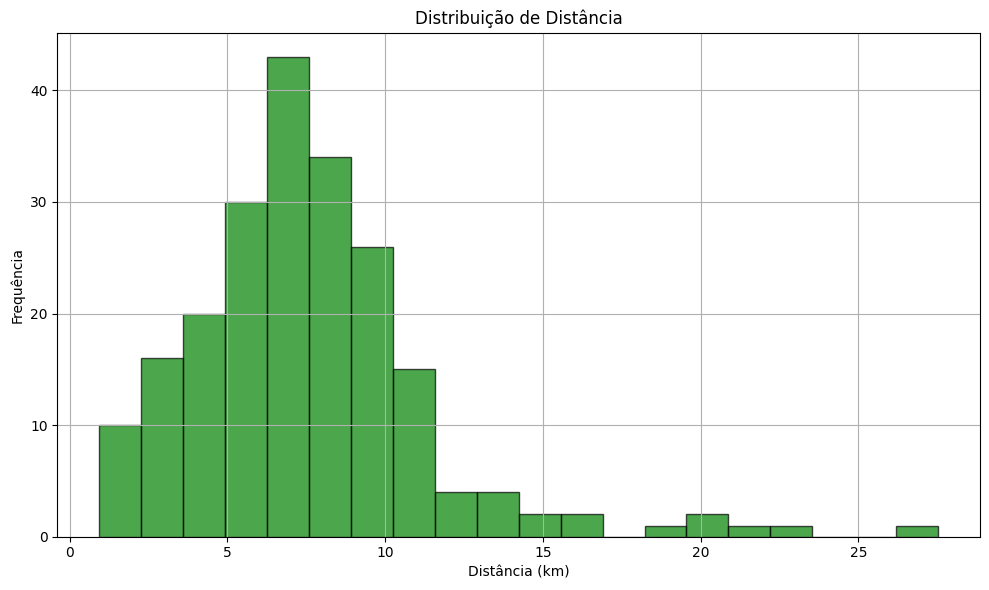

In [ ]:
# gráfico de distribuição da distância
plt.figure(figsize=(10, 6))
plt.hist(df['Distância'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Distância')
plt.xlabel('Distância (km)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()


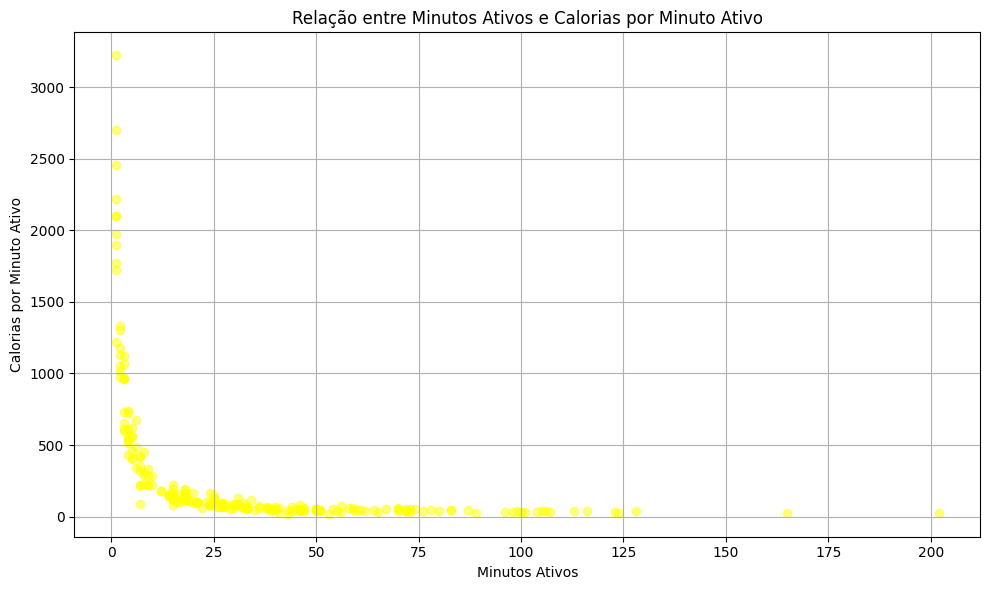

In [ ]:
# gráfico de dispersão em relação entre minutos ativos e calorias por minuto ativo
plt.figure(figsize=(10, 6))
plt.scatter(df['Minutos_Ativos'], df['Calorias_por_Minuto_Ativo'], color='yellow', alpha=0.5)
plt.title('Relação entre Minutos Ativos e Calorias por Minuto Ativo')
plt.xlabel('Minutos Ativos')
plt.ylabel('Calorias por Minuto Ativo')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-26-6e10447b8942>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])


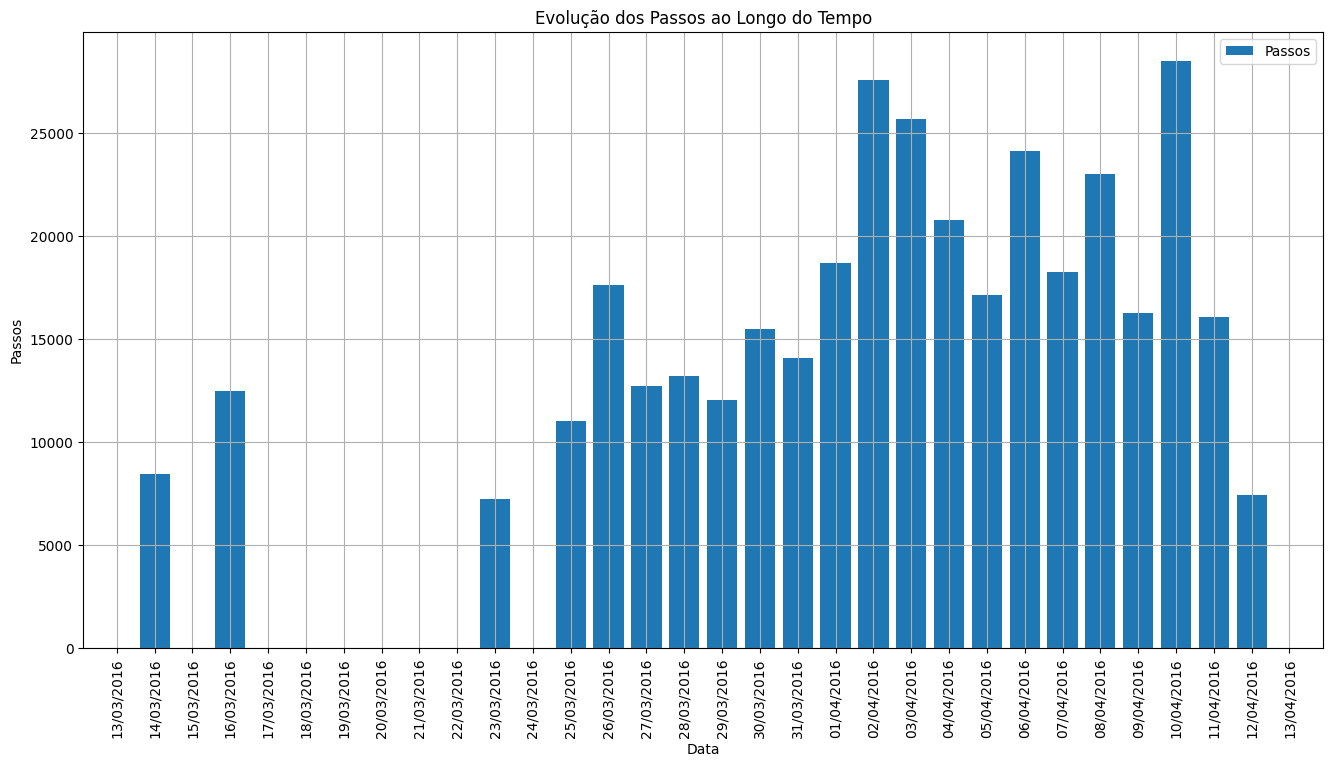

In [ ]:
# gráfico de quantidade passos por dia

# coloca a coluna 'Data' no formato correto
df['Data'] = pd.to_datetime(df['Data'])

# ordenar o dataframe pela coluna 'Data'
df = df.sort_values('Data')

# gráfico de barras para a coluna 'Passos'
plt.figure(figsize=(16, 8))
plt.bar(df['Data'], df['Passos'], label='Passos')

# formatação das datas no eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=90)

# estilos
plt.title('Evolução dos Passos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Passos')
plt.grid()
plt.legend()
plt.show()


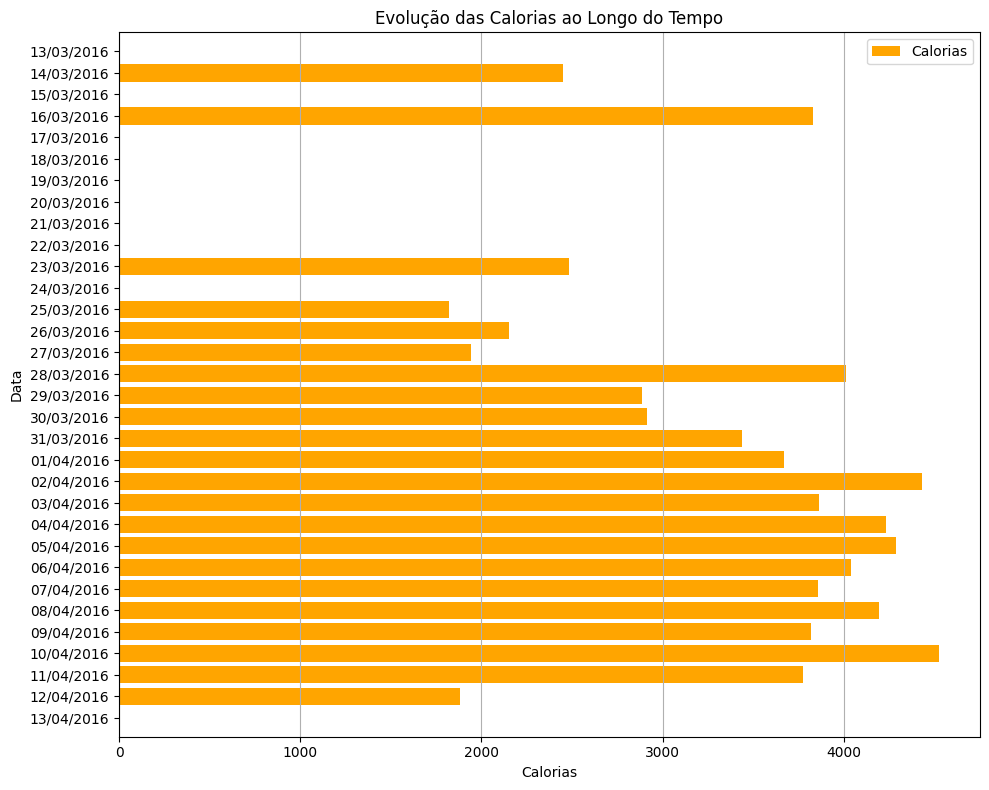

In [ ]:
# gráfico de calorias por dia

# coloca a coluna 'datas' no formato correto
df['Data'] = pd.to_datetime(df['Data'])

# ordenar o dataframe pela coluna 'datas'
df = df.sort_values('Data')

# gráfico de barras para a coluna 'calorias'
plt.figure(figsize=(10, 8))
plt.barh(df['Data'], df['Calorias'], label='Calorias', color = 'orange')

# formatação das datas no eixo y
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().yaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().invert_yaxis()

# estilos
plt.title('Evolução das Calorias ao Longo do Tempo')
plt.xlabel('Calorias')
plt.ylabel('Data')
plt.grid(axis='x')
plt.legend()
plt.tight_layout()
plt.show()

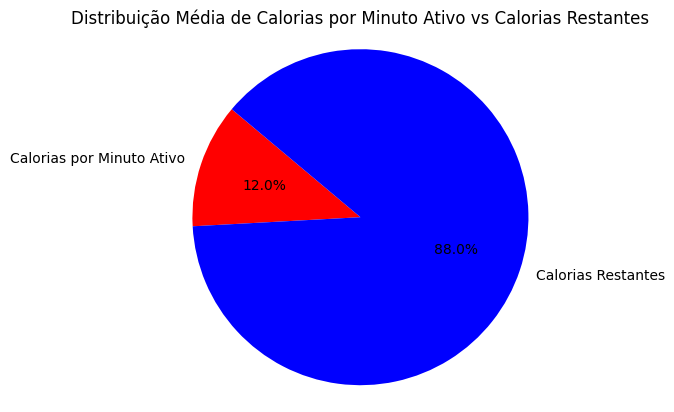

In [ ]:
# gráfico de representação de média de calorias por minuto ativo em comparação as restantes

# média de calorias por minuto ativo
media_calorias_por_minuto_ativo = df['Calorias_por_Minuto_Ativo'].mean()

# média de calorias
media_calorias = df['Calorias'].mean()

# nome das fatias do gráfico de pizza
labels = ['Calorias por Minuto Ativo', 'Calorias Restantes']

# botando valores para as fatias do gráfico de pizza
sizes = [media_calorias_por_minuto_ativo, media_calorias - media_calorias_por_minuto_ativo]

# cores
colors = ['red', 'blue']

# gráfico de pizza
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# estilo
plt.title('Distribuição Média de Calorias por Minuto Ativo vs Calorias Restantes')
plt.axis('equal')
plt.show()